In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

In [120]:
df = pd.read_csv('customer_churn.csv')
df.head()

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,...,Yes,No,No,No,One year,No,Mailed check,56.95,1889.5,No
2,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,7795-CFOCW,Male,0,No,No,45,No,No phone service,DSL,Yes,...,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,9237-HQITU,Female,0,No,No,2,Yes,No,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes


In [4]:
df.columns

Index(['customerID', 'gender', 'SeniorCitizen', 'Partner', 'Dependents',
       'tenure', 'PhoneService', 'MultipleLines', 'InternetService',
       'OnlineSecurity', 'OnlineBackup', 'DeviceProtection', 'TechSupport',
       'StreamingTV', 'StreamingMovies', 'Contract', 'PaperlessBilling',
       'PaymentMethod', 'MonthlyCharges', 'TotalCharges', 'Churn'],
      dtype='object')

In [5]:
df.shape

(7043, 21)

In [7]:
df.isna().sum()

customerID          0
gender              0
SeniorCitizen       0
Partner             0
Dependents          0
tenure              0
PhoneService        0
MultipleLines       0
InternetService     0
OnlineSecurity      0
OnlineBackup        0
DeviceProtection    0
TechSupport         0
StreamingTV         0
StreamingMovies     0
Contract            0
PaperlessBilling    0
PaymentMethod       0
MonthlyCharges      0
TotalCharges        0
Churn               0
dtype: int64

In [121]:
df.drop('customerID', axis = 'columns', inplace = True)

In [97]:
df.shape

(7043, 20)

In [98]:
df[df.tenure > 65]  # that's means here tenure's value are months

,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
15,Female,0,Yes,Yes,69,Yes,Yes,Fiber optic,Yes,Yes,Yes,Yes,Yes,Yes,Two year,No,Credit card (automatic),113.25,7895.15,No
17,Male,0,No,Yes,71,Yes,Yes,Fiber optic,Yes,No,Yes,No,Yes,Yes,Two year,No,Bank transfer (automatic),106.70,7382.25,No
28,Male,0,Yes,No,72,Yes,Yes,DSL,Yes,Yes,Yes,Yes,Yes,Yes,Two year,Yes,Credit card (automatic),90.25,6369.45,No
30,Female,1,Yes,No,71,Yes,Yes,Fiber optic,Yes,Yes,Yes,Yes,No,No,Two year,Yes,Credit card (automatic),96.35,6766.95,No
35,Female,0,Yes,Yes,72,Yes,Yes,Fiber optic,Yes,Yes,No,Yes,Yes,No,Two year,No,Bank transfer (automatic),99.90,7251.7,No
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7028,Female,0,Yes,No,68,Yes,No,DSL,No,Yes,No,Yes,Yes,No,Two year,No,Bank transfer (automatic),64.10,4326.25,No
7034,Female,0,No,No,67,Yes,Yes,Fiber optic,Yes,Yes,Yes,No,Yes,No,Month-to-month,Yes,Credit card (automatic),102.95,6886.25,Yes
7037,Female,0,No,No,72,Yes,No,No,No internet service,No internet service,No internet service,No internet service,No internet service,No internet service,Two year,Yes,Bank transfer (automatic),21.15,1419.4,No
7039,Female,0,Yes,Yes,72,Yes,Yes,Fiber optic,No,Yes,Yes,No,Yes,Yes,One year,Yes,Credit card (automatic),103.20,7362.9,No


In [21]:
df.gender.unique()

array(['Female', 'Male'], dtype=object)

In [26]:
df.dtypes

gender               object
SeniorCitizen         int64
Partner              object
Dependents           object
tenure                int64
PhoneService         object
MultipleLines        object
InternetService      object
OnlineSecurity       object
OnlineBackup         object
DeviceProtection     object
TechSupport          object
StreamingTV          object
StreamingMovies      object
Contract             object
PaperlessBilling     object
PaymentMethod        object
MonthlyCharges      float64
TotalCharges         object
Churn                object
dtype: object

In [122]:
for i in df.columns:
    print(f' {i}:  {df[i].unique()}')

 gender:  ['Female' 'Male']
 SeniorCitizen:  [0 1]
 Partner:  ['Yes' 'No']
 Dependents:  ['No' 'Yes']
 tenure:  [ 1 34  2 45  8 22 10 28 62 13 16 58 49 25 69 52 71 21 12 30 47 72 17 27
  5 46 11 70 63 43 15 60 18 66  9  3 31 50 64 56  7 42 35 48 29 65 38 68
 32 55 37 36 41  6  4 33 67 23 57 61 14 20 53 40 59 24 44 19 54 51 26  0
 39]
 PhoneService:  ['No' 'Yes']
 MultipleLines:  ['No phone service' 'No' 'Yes']
 InternetService:  ['DSL' 'Fiber optic' 'No']
 OnlineSecurity:  ['No' 'Yes' 'No internet service']
 OnlineBackup:  ['Yes' 'No' 'No internet service']
 DeviceProtection:  ['No' 'Yes' 'No internet service']
 TechSupport:  ['No' 'Yes' 'No internet service']
 StreamingTV:  ['No' 'Yes' 'No internet service']
 StreamingMovies:  ['No' 'Yes' 'No internet service']
 Contract:  ['Month-to-month' 'One year' 'Two year']
 PaperlessBilling:  ['Yes' 'No']
 PaymentMethod:  ['Electronic check' 'Mailed check' 'Bank transfer (automatic)'
 'Credit card (automatic)']
 MonthlyCharges:  [29.85 56.95 53

In [123]:
df.TotalCharges.values

array(['29.85', '1889.5', '108.15', ..., '346.45', '306.6', '6844.5'],
      dtype=object)

In [124]:
df.TotalCharges.isna()

0       False
1       False
2       False
3       False
4       False
        ...  
7038    False
7039    False
7040    False
7041    False
7042    False
Name: TotalCharges, Length: 7043, dtype: bool

In [34]:
df.TotalCharges = df.TotalCharges.astype(float)

ValueError: could not convert string to float: ' '

In [125]:
df.iloc[488]

gender                                 Female
SeniorCitizen                               0
Partner                                   Yes
Dependents                                Yes
tenure                                      0
PhoneService                               No
MultipleLines                No phone service
InternetService                           DSL
OnlineSecurity                            Yes
OnlineBackup                               No
DeviceProtection                          Yes
TechSupport                               Yes
StreamingTV                               Yes
StreamingMovies                            No
Contract                             Two year
PaperlessBilling                          Yes
PaymentMethod       Bank transfer (automatic)
MonthlyCharges                          52.55
TotalCharges                                 
Churn                                      No
Name: 488, dtype: object

In [126]:
df.loc[[488]]

,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
488,Female,0,Yes,Yes,0,No,No phone service,DSL,Yes,No,Yes,Yes,Yes,No,Two year,Yes,Bank transfer (automatic),52.55,,No


In [127]:
df.TotalCharges = pd.to_numeric(df.TotalCharges, errors = 'coerce')

In [128]:
df.TotalCharges.values

array([  29.85, 1889.5 ,  108.15, ...,  346.45,  306.6 , 6844.5 ])

In [129]:
df.TotalCharges.dtypes

dtype('float64')

In [130]:
df[df.TotalCharges.isna()]

,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
488,Female,0,Yes,Yes,0,No,No phone service,DSL,Yes,No,Yes,Yes,Yes,No,Two year,Yes,Bank transfer (automatic),52.55,NaN,No
753,Male,0,No,Yes,0,Yes,No,No,No internet service,No internet service,No internet service,No internet service,No internet service,No internet service,Two year,No,Mailed check,20.25,NaN,No
936,Female,0,Yes,Yes,0,Yes,No,DSL,Yes,Yes,Yes,No,Yes,Yes,Two year,No,Mailed check,80.85,NaN,No
1082,Male,0,Yes,Yes,0,Yes,Yes,No,No internet service,No internet service,No internet service,No internet service,No internet service,No internet service,Two year,No,Mailed check,25.75,NaN,No
1340,Female,0,Yes,Yes,0,No,No phone service,DSL,Yes,Yes,Yes,Yes,Yes,No,Two year,No,Credit card (automatic),56.05,NaN,No
3331,Male,0,Yes,Yes,0,Yes,No,No,No internet service,No internet service,No internet service,No internet service,No internet service,No internet service,Two year,No,Mailed check,19.85,NaN,No
3826,Male,0,Yes,Yes,0,Yes,Yes,No,No internet service,No internet service,No internet service,No internet service,No internet service,No internet service,Two year,No,Mailed check,25.35,NaN,No
4380,Female,0,Yes,Yes,0,Yes,No,No,No internet service,No internet service,No internet service,No internet service,No internet service,No internet service,Two year,No,Mailed check,20.00,NaN,No
5218,Male,0,Yes,Yes,0,Yes,No,No,No internet service,No internet service,No internet service,No internet service,No internet service,No internet service,One year,Yes,Mailed check,19.70,NaN,No
6670,Female,0,Yes,Yes,0,Yes,Yes,DSL,No,Yes,Yes,Yes,Yes,No,Two year,No,Mailed check,73.35,NaN,No


In [131]:
df[df.TotalCharges.isna()].shape

(11, 20)

In [132]:
df.shape

(7043, 20)

In [133]:
df.TotalCharges.fillna(0, inplace = True)

In [134]:
df[df.TotalCharges == 0].shape

(11, 20)

In [135]:
df1 = df[df.TotalCharges != 0]

In [136]:
df1.shape

(7032, 20)

In [137]:
df1.dtypes

gender               object
SeniorCitizen         int64
Partner              object
Dependents           object
tenure                int64
PhoneService         object
MultipleLines        object
InternetService      object
OnlineSecurity       object
OnlineBackup         object
DeviceProtection     object
TechSupport          object
StreamingTV          object
StreamingMovies      object
Contract             object
PaperlessBilling     object
PaymentMethod        object
MonthlyCharges      float64
TotalCharges        float64
Churn                object
dtype: object

In [147]:
def get_objects(d):
    for i in d.columns:
        if d[i].dtypes == 'object':
            print(f'{i}: {d[i].unique()}')

In [148]:
get_objects(df1)

gender: ['Female' 'Male']
Partner: ['Yes' 'No']
Dependents: ['No' 'Yes']
PhoneService: ['No' 'Yes']
MultipleLines: ['No phone service' 'No' 'Yes']
InternetService: ['DSL' 'Fiber optic' 'No']
OnlineSecurity: ['No' 'Yes' 'No internet service']
OnlineBackup: ['Yes' 'No' 'No internet service']
DeviceProtection: ['No' 'Yes' 'No internet service']
TechSupport: ['No' 'Yes' 'No internet service']
StreamingTV: ['No' 'Yes' 'No internet service']
StreamingMovies: ['No' 'Yes' 'No internet service']
Contract: ['Month-to-month' 'One year' 'Two year']
PaperlessBilling: ['Yes' 'No']
PaymentMethod: ['Electronic check' 'Mailed check' 'Bank transfer (automatic)'
 'Credit card (automatic)']
Churn: ['No' 'Yes']


In [117]:
df1.sample(3)

,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
4246,Male,0,Yes,Yes,68,Yes,Yes,Fiber optic,Yes,Yes,Yes,No,Yes,Yes,Two year,Yes,Electronic check,110.20,7467.5,No
1125,Male,1,Yes,No,39,Yes,Yes,Fiber optic,No,Yes,Yes,No,Yes,Yes,Month-to-month,Yes,Electronic check,105.65,4284.8,Yes
787,Female,0,Yes,No,34,Yes,Yes,DSL,Yes,No,No,Yes,No,No,Month-to-month,Yes,Bank transfer (automatic),60.85,2003.6,No


C:\Users\Himel\AppData\Local\Temp\ipykernel_10428\3274365542.py:1: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  tenure_chrun_no = df1[df.Churn == 'No'].tenure
C:\Users\Himel\AppData\Local\Temp\ipykernel_10428\3274365542.py:2: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  tenure_chrun_yes = df1[df.Churn == 'Yes'].tenure


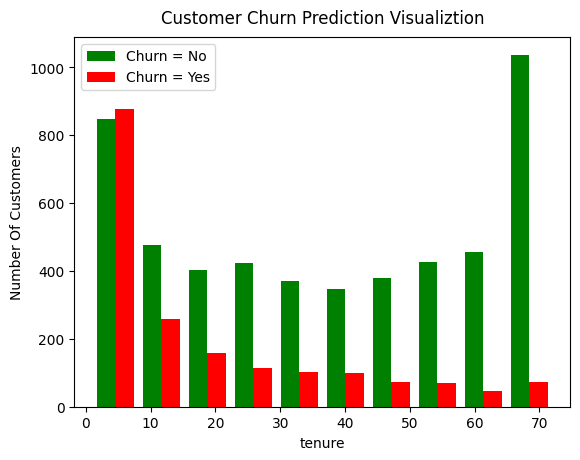

In [69]:
tenure_chrun_no = df1[df.Churn == 'No'].tenure
tenure_chrun_yes = df1[df.Churn == 'Yes'].tenure
plt.xlabel("tenure", color = 'black')
plt.ylabel("Number Of Customers", color = 'black')
plt.title("Customer Churn Prediction Visualiztion", pad = 10)

plt.hist([tenure_chrun_no, tenure_chrun_yes], color = ['green', 'red'], label = ['Churn = No', 'Churn = Yes'])
plt.legend()

In [140]:
get_objects(df1)

gender: ['Female' 'Male']
Partner: ['Yes' 'No']
Dependents: ['No' 'Yes']
PhoneService: ['No' 'Yes']
MultipleLines: ['No phone service' 'No' 'Yes']
InternetService: ['DSL' 'Fiber optic' 'No']
OnlineSecurity: ['No' 'Yes' 'No internet service']
OnlineBackup: ['Yes' 'No' 'No internet service']
DeviceProtection: ['No' 'Yes' 'No internet service']
TechSupport: ['No' 'Yes' 'No internet service']
StreamingTV: ['No' 'Yes' 'No internet service']
StreamingMovies: ['No' 'Yes' 'No internet service']
Contract: ['Month-to-month' 'One year' 'Two year']
PaperlessBilling: ['Yes' 'No']
PaymentMethod: ['Electronic check' 'Mailed check' 'Bank transfer (automatic)'
 'Credit card (automatic)']
Churn: ['No' 'Yes']


In [149]:
df2 = df1.replace('No internet service', 'No')

In [150]:
get_objects(df2)

gender: ['Female' 'Male']
Partner: ['Yes' 'No']
Dependents: ['No' 'Yes']
PhoneService: ['No' 'Yes']
MultipleLines: ['No phone service' 'No' 'Yes']
InternetService: ['DSL' 'Fiber optic' 'No']
OnlineSecurity: ['No' 'Yes']
OnlineBackup: ['Yes' 'No']
DeviceProtection: ['No' 'Yes']
TechSupport: ['No' 'Yes']
StreamingTV: ['No' 'Yes']
StreamingMovies: ['No' 'Yes']
Contract: ['Month-to-month' 'One year' 'Two year']
PaperlessBilling: ['Yes' 'No']
PaymentMethod: ['Electronic check' 'Mailed check' 'Bank transfer (automatic)'
 'Credit card (automatic)']
Churn: ['No' 'Yes']


In [152]:
df3 = df2.replace('No phone service', 'No')

In [153]:
get_objects(df3)

gender: ['Female' 'Male']
Partner: ['Yes' 'No']
Dependents: ['No' 'Yes']
PhoneService: ['No' 'Yes']
MultipleLines: ['No' 'Yes']
InternetService: ['DSL' 'Fiber optic' 'No']
OnlineSecurity: ['No' 'Yes']
OnlineBackup: ['Yes' 'No']
DeviceProtection: ['No' 'Yes']
TechSupport: ['No' 'Yes']
StreamingTV: ['No' 'Yes']
StreamingMovies: ['No' 'Yes']
Contract: ['Month-to-month' 'One year' 'Two year']
PaperlessBilling: ['Yes' 'No']
PaymentMethod: ['Electronic check' 'Mailed check' 'Bank transfer (automatic)'
 'Credit card (automatic)']
Churn: ['No' 'Yes']


In [154]:
columns_to_map = ['Partner','Dependents','PhoneService','MultipleLines','OnlineSecurity','OnlineBackup','DeviceProtection','TechSupport','StreamingTV','StreamingMovies','PaperlessBilling','Churn']

for i in columns_to_map:
    df3[i] = df3[i].map({
        'Yes': 1,
        'No': 0
    })

In [155]:
get_objects(df3)

gender: ['Female' 'Male']
InternetService: ['DSL' 'Fiber optic' 'No']
Contract: ['Month-to-month' 'One year' 'Two year']
PaymentMethod: ['Electronic check' 'Mailed check' 'Bank transfer (automatic)'
 'Credit card (automatic)']


In [156]:
for i in df3.columns:
    print(f' {i}:  {df3[i].unique()}')

 gender:  ['Female' 'Male']
 SeniorCitizen:  [0 1]
 Partner:  [1 0]
 Dependents:  [0 1]
 tenure:  [ 1 34  2 45  8 22 10 28 62 13 16 58 49 25 69 52 71 21 12 30 47 72 17 27
  5 46 11 70 63 43 15 60 18 66  9  3 31 50 64 56  7 42 35 48 29 65 38 68
 32 55 37 36 41  6  4 33 67 23 57 61 14 20 53 40 59 24 44 19 54 51 26 39]
 PhoneService:  [0 1]
 MultipleLines:  [0 1]
 InternetService:  ['DSL' 'Fiber optic' 'No']
 OnlineSecurity:  [0 1]
 OnlineBackup:  [1 0]
 DeviceProtection:  [0 1]
 TechSupport:  [0 1]
 StreamingTV:  [0 1]
 StreamingMovies:  [0 1]
 Contract:  ['Month-to-month' 'One year' 'Two year']
 PaperlessBilling:  [1 0]
 PaymentMethod:  ['Electronic check' 'Mailed check' 'Bank transfer (automatic)'
 'Credit card (automatic)']
 MonthlyCharges:  [29.85 56.95 53.85 ... 63.1  44.2  78.7 ]
 TotalCharges:  [  29.85 1889.5   108.15 ...  346.45  306.6  6844.5 ]
 Churn:  [0 1]


In [157]:
df3.dtypes

gender               object
SeniorCitizen         int64
Partner               int64
Dependents            int64
tenure                int64
PhoneService          int64
MultipleLines         int64
InternetService      object
OnlineSecurity        int64
OnlineBackup          int64
DeviceProtection      int64
TechSupport           int64
StreamingTV           int64
StreamingMovies       int64
Contract             object
PaperlessBilling      int64
PaymentMethod        object
MonthlyCharges      float64
TotalCharges        float64
Churn                 int64
dtype: object

In [158]:
df3['gender'] = df3['gender'].map({
    'Male': 1,
    'Female': 0
})

In [159]:
df3.dtypes

gender                int64
SeniorCitizen         int64
Partner               int64
Dependents            int64
tenure                int64
PhoneService          int64
MultipleLines         int64
InternetService      object
OnlineSecurity        int64
OnlineBackup          int64
DeviceProtection      int64
TechSupport           int64
StreamingTV           int64
StreamingMovies       int64
Contract             object
PaperlessBilling      int64
PaymentMethod        object
MonthlyCharges      float64
TotalCharges        float64
Churn                 int64
dtype: object

In [160]:
get_objects(df3)

InternetService: ['DSL' 'Fiber optic' 'No']
Contract: ['Month-to-month' 'One year' 'Two year']
PaymentMethod: ['Electronic check' 'Mailed check' 'Bank transfer (automatic)'
 'Credit card (automatic)']


In [169]:
df4 = pd.get_dummies(data = df3, columns = ['InternetService', 'Contract', 'PaymentMethod'], dtype = int)

In [170]:
df4.dtypes

gender                                       int64
SeniorCitizen                                int64
Partner                                      int64
Dependents                                   int64
tenure                                       int64
PhoneService                                 int64
MultipleLines                                int64
OnlineSecurity                               int64
OnlineBackup                                 int64
DeviceProtection                             int64
TechSupport                                  int64
StreamingTV                                  int64
StreamingMovies                              int64
PaperlessBilling                             int64
MonthlyCharges                             float64
TotalCharges                               float64
Churn                                        int64
InternetService_DSL                          int32
InternetService_Fiber optic                  int32
InternetService_No             

In [171]:
df4.sample(6)

,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,OnlineSecurity,OnlineBackup,DeviceProtection,...,InternetService_DSL,InternetService_Fiber optic,InternetService_No,Contract_Month-to-month,Contract_One year,Contract_Two year,PaymentMethod_Bank transfer (automatic),PaymentMethod_Credit card (automatic),PaymentMethod_Electronic check,PaymentMethod_Mailed check
1248,0,0,0,0,11,1,1,0,0,0,...,0,1,0,1,0,0,0,0,1,0
2345,0,0,0,1,4,1,0,0,0,0,...,0,0,1,1,0,0,1,0,0,0
1795,0,0,1,0,19,1,1,0,0,1,...,0,1,0,1,0,0,0,0,0,1
2786,1,0,0,1,27,1,0,1,1,0,...,1,0,0,0,1,0,0,0,0,1
76,0,0,0,0,46,1,0,0,0,0,...,1,0,0,0,1,0,0,1,0,0
3781,1,0,0,0,29,1,0,0,0,0,...,0,0,1,0,1,0,0,0,0,1


In [176]:
from sklearn.preprocessing import MinMaxScaler
col_to_scale = ['tenure','MonthlyCharges','TotalCharges']
scale = MinMaxScaler()
df4[col_to_scale] = scale.fit_transform(df4[col_to_scale])

In [177]:
df4.sample(3)

,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,OnlineSecurity,OnlineBackup,DeviceProtection,...,InternetService_DSL,InternetService_Fiber optic,InternetService_No,Contract_Month-to-month,Contract_One year,Contract_Two year,PaymentMethod_Bank transfer (automatic),PaymentMethod_Credit card (automatic),PaymentMethod_Electronic check,PaymentMethod_Mailed check
770,1,0,0,0,0.140845,1,0,0,0,0,...,0,0,1,1,0,0,0,1,0,0
1087,1,0,0,0,0.436620,1,1,1,0,0,...,0,1,0,1,0,0,1,0,0,0
2640,1,0,0,0,0.295775,1,0,0,1,1,...,0,1,0,1,0,0,1,0,0,0


In [178]:
for col in df4:
    print(f'{col}: {df4[col].unique()}')

gender: [0 1]
SeniorCitizen: [0 1]
Partner: [1 0]
Dependents: [0 1]
tenure: [0.         0.46478873 0.01408451 0.61971831 0.09859155 0.29577465
 0.12676056 0.38028169 0.85915493 0.16901408 0.21126761 0.8028169
 0.67605634 0.33802817 0.95774648 0.71830986 0.98591549 0.28169014
 0.15492958 0.4084507  0.64788732 1.         0.22535211 0.36619718
 0.05633803 0.63380282 0.14084507 0.97183099 0.87323944 0.5915493
 0.1971831  0.83098592 0.23943662 0.91549296 0.11267606 0.02816901
 0.42253521 0.69014085 0.88732394 0.77464789 0.08450704 0.57746479
 0.47887324 0.66197183 0.3943662  0.90140845 0.52112676 0.94366197
 0.43661972 0.76056338 0.50704225 0.49295775 0.56338028 0.07042254
 0.04225352 0.45070423 0.92957746 0.30985915 0.78873239 0.84507042
 0.18309859 0.26760563 0.73239437 0.54929577 0.81690141 0.32394366
 0.6056338  0.25352113 0.74647887 0.70422535 0.35211268 0.53521127]
PhoneService: [0 1]
MultipleLines: [0 1]
OnlineSecurity: [0 1]
OnlineBackup: [1 0]
DeviceProtection: [0 1]
TechSupport: [

In [179]:
x = df4.drop('Churn', axis = 'columns')
y = df4.Churn

In [180]:
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(x,y,test_size=0.2,random_state=42)

In [181]:
x_train.shape

(5625, 26)

In [182]:
x_test.shape

(1407, 26)

In [183]:
import tensorflow as tf
from tensorflow import keras

In [186]:
model = keras.Sequential([
    keras.layers.Dense(26, input_shape = (26,), activation = 'sigmoid'),
    keras.layers.Dense(10, activation = 'relu'),
    keras.layers.Dense(5, activation = 'tanh'),
])


model.compile(
    optimizer = 'adam',
    loss = 'binary_crossentropy', # binary_crossentropy
    metrics = ['accuracy']
)

model.fit(x_train, y_train, epochs = 100)

Epoch 1/100
176/176 [==============================] - 6s 2ms/step - loss: 2.6616 - accuracy: 0.6402
Epoch 2/100
176/176 [==============================] - 0s 2ms/step - loss: 2.6563 - accuracy: 0.4308
Epoch 3/100
176/176 [==============================] - 0s 2ms/step - loss: 2.6513 - accuracy: 0.6345
Epoch 4/100
176/176 [==============================] - 0s 2ms/step - loss: 2.6481 - accuracy: 0.5982
Epoch 5/100
176/176 [==============================] - 0s 2ms/step - loss: 2.6499 - accuracy: 0.5659
Epoch 6/100
176/176 [==============================] - 0s 2ms/step - loss: 2.6577 - accuracy: 0.4183
Epoch 7/100
176/176 [==============================] - 0s 2ms/step - loss: 2.6407 - accuracy: 0.5890
Epoch 8/100
176/176 [==============================] - 0s 3ms/step - loss: 2.6427 - accuracy: 0.6046
Epoch 9/100
176/176 [==============================] - 0s 2ms/step - loss: 2.6448 - accuracy: 0.6139
Epoch 10/100
176/176 [==============================] - 0s 2ms/step - loss: 2.6837 - accura

In [193]:
from keras.models import Sequential
from keras.layers import Dense, Dropout, BatchNormalization
from keras.regularizers import l2

model01 = Sequential([
    Dense(100, input_shape=(26,), activation='relu', kernel_regularizer=l2(0.001)),
    BatchNormalization(),
    Dropout(0.5),
    Dense(50, activation='relu', kernel_regularizer=l2(0.001)),
    BatchNormalization(),
    Dropout(0.5),
    Dense(26, activation='softmax')  # Assuming a 5-class classification problem
])

model01.compile(
    optimizer='adam',
    loss='sparse_categorical_crossentropy',
    metrics=['accuracy']
)

model01.fit(x_train, y_train, epochs=100, batch_size=32, validation_split=0.2)

Epoch 1/100
141/141 [==============================] - 2s 8ms/step - loss: 3.2385 - accuracy: 0.2938 - val_loss: 1.7183 - val_accuracy: 0.7716
Epoch 2/100
141/141 [==============================] - 0s 3ms/step - loss: 1.7939 - accuracy: 0.6700 - val_loss: 0.8588 - val_accuracy: 0.7902
Epoch 3/100
141/141 [==============================] - 1s 4ms/step - loss: 1.1138 - accuracy: 0.7536 - val_loss: 0.6064 - val_accuracy: 0.8107
Epoch 4/100
141/141 [==============================] - 1s 4ms/step - loss: 0.8018 - accuracy: 0.7684 - val_loss: 0.5309 - val_accuracy: 0.8116
Epoch 5/100
141/141 [==============================] - 1s 4ms/step - loss: 0.6793 - accuracy: 0.7716 - val_loss: 0.5095 - val_accuracy: 0.8009
Epoch 6/100
141/141 [==============================] - 0s 3ms/step - loss: 0.6218 - accuracy: 0.7758 - val_loss: 0.5029 - val_accuracy: 0.8098
Epoch 7/100
141/141 [==============================] - 0s 4ms/step - loss: 0.5886 - accuracy: 0.7793 - val_loss: 0.4974 - val_accuracy: 0.8062

In [194]:
model02 = keras.Sequential([
    keras.layers.Dense(26, input_shape=(26,), activation='relu'),
    keras.layers.Dense(15, activation='relu'),
    keras.layers.Dense(1, activation='sigmoid')
])

model02.compile(
    optimizer='adam',
    loss='binary_crossentropy',
    metrics=['accuracy']
)

model02.fit(x_train, y_train, epochs=100, batch_size=32, validation_split=0.2)

Epoch 1/100
141/141 [==============================] - 3s 9ms/step - loss: 0.5270 - accuracy: 0.7371 - val_loss: 0.4629 - val_accuracy: 0.7218
Epoch 2/100
141/141 [==============================] - 0s 3ms/step - loss: 0.4529 - accuracy: 0.7480 - val_loss: 0.4326 - val_accuracy: 0.7618
Epoch 3/100
141/141 [==============================] - 0s 3ms/step - loss: 0.4397 - accuracy: 0.7876 - val_loss: 0.4270 - val_accuracy: 0.7947
Epoch 4/100
141/141 [==============================] - 0s 3ms/step - loss: 0.4337 - accuracy: 0.7973 - val_loss: 0.4224 - val_accuracy: 0.8018
Epoch 5/100
141/141 [==============================] - 0s 3ms/step - loss: 0.4307 - accuracy: 0.8000 - val_loss: 0.4208 - val_accuracy: 0.8009
Epoch 6/100
141/141 [==============================] - 0s 3ms/step - loss: 0.4278 - accuracy: 0.8007 - val_loss: 0.4184 - val_accuracy: 0.8044
Epoch 7/100
141/141 [==============================] - 0s 2ms/step - loss: 0.4239 - accuracy: 0.8016 - val_loss: 0.4163 - val_accuracy: 0.8062

In [195]:
model02.evaluate(x_test, y_test)

44/44 [==============================] - 6s 67ms/step - loss: 0.5322 - accuracy: 0.7775


[0.532232403755188, 0.7775408625602722]

In [196]:
p = model02.predict(x_test)

44/44 [==============================] - 53s 26ms/step


In [199]:
p[:10]

array([[0.00156742],
       [0.09248059],
       [0.81151074],
       [0.00122161],
       [0.05681306],
       [0.78811806],
       [0.05252853],
       [0.7630143 ],
       [0.03341613],
       [0.00950804]], dtype=float32)

In [200]:
y_test[:10]

2481    0
6784    0
6125    1
3052    0
4099    0
3223    0
3774    0
3469    0
3420    0
1196    0
Name: Churn, dtype: int64

In [201]:
predicted = []
for i in p:
    if i > 0.50:
        predicted.append(1)
    else:
        predicted.append(0)

In [202]:
predicted[:10]

[0, 0, 1, 0, 0, 1, 0, 1, 0, 0]

Text(95.72222222222221, 0.5, 'Truth')

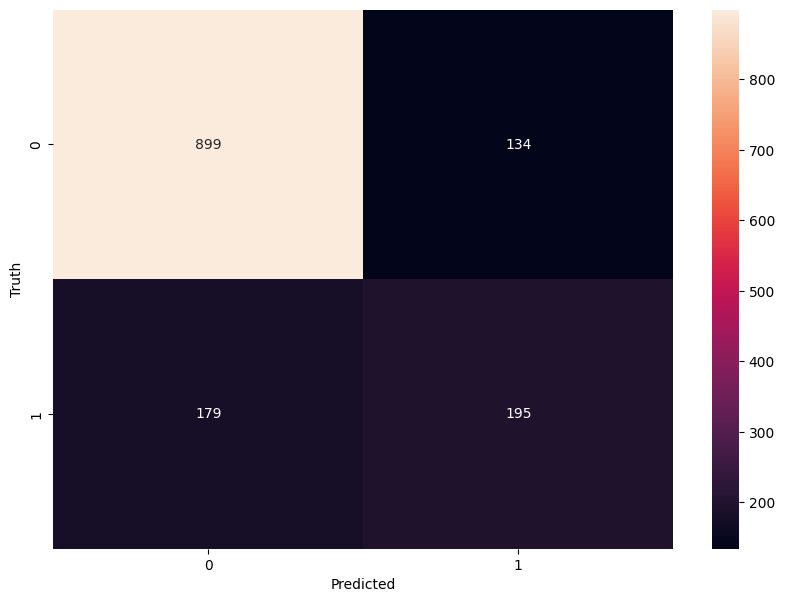

In [204]:
from sklearn.metrics import confusion_matrix , classification_report
import seaborn as sn
cm = tf.math.confusion_matrix(labels=y_test,predictions = predicted)

plt.figure(figsize = (10,7))
sn.heatmap(cm, annot=True, fmt='d')
plt.xlabel('Predicted')
plt.ylabel('Truth')

In [206]:
print(classification_report(y_test,predicted))

              precision    recall  f1-score   support

           0       0.83      0.87      0.85      1033
           1       0.59      0.52      0.55       374

    accuracy                           0.78      1407
   macro avg       0.71      0.70      0.70      1407
weighted avg       0.77      0.78      0.77      1407



# Accuracy

In [208]:
round((899+195)/(899+134+179+195), 2)

0.78

# precision

In [210]:
round((899)/(899+179), 2)

0.83

In [211]:
round((195)/(195+134), 2)

0.59

# recall

In [212]:
round((899)/(899+134), 2)

0.87

In [213]:
round((195)/(195+179), 2)

0.52

# f1 = 2 * precision * recall / (precision + recall)